# **CVPS20 // Example: Rolling Average of Global Sea Level rise**

<i>September 22, 2020</i>

---

Working in groups, execute the cells below to pull data for the global sea level as a function of time from the National Oceanic and Atmospheric Administration's online database.

Then, plot the original sea level vs time as well as the sea level with a rolling mean filter applied (see `scipy.ndimage.filters`'s `uniform_filter`) with a width of **1 year** and with a width of **5 years**.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
def get_global_sealevel():
  """
  Return the global sea level time series with seasonal effects removed from 
  NOAA's online database, https://www.star.nesdis.noaa.gov.

  Returns:
  -------
  yr_int : np.ndarray, float
    year
  
  sl_int : np.ndarray, float
    interpolated sea level in mm since 2000
  """

  # -- set the filename
  fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_txj1j2_90.csv"

  # -- read the csv
  data = pd.read_csv(fname, skiprows=5).values

  # -- calculate sea level
  sealev = np.nanmax(data[:, 1:], axis=1)

  # -- extract year
  year = data[:, 0]

  # -- linearly interpolate to every 0.02 year
  yr_int = np.arange(1993, 2020, 0.02)
  sl_int = np.interp(yr_int, year, sealev)

  return yr_int, sl_int


# -- run the function
year, sealev = get_global_sealevel()

Text(0, 0.5, 'Sea Level')

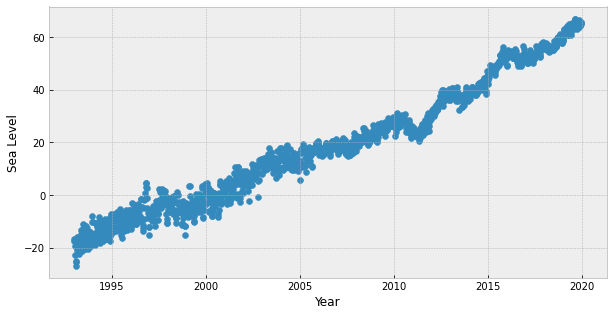

In [23]:
plt.scatter(year, sealev)
plt.xlabel('Year')
plt.ylabel('Sea Level')

Text(0.5, 1.0, 'Manual Rolling Mean w/ Width 1 Year')

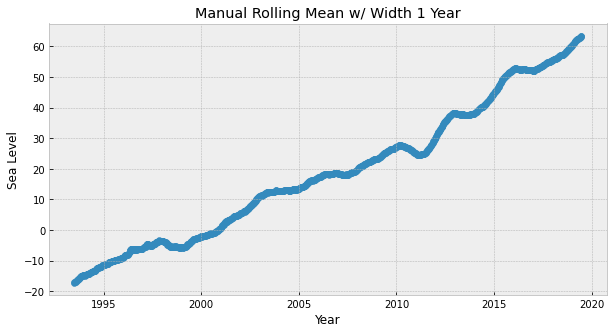

In [39]:
width = 50
mean_lst = []
time_lst = []
for i in range(0, len(sealev) - width):
  width_mean = np.mean(sealev[i:i+width])
  time_mean = np.mean(year[i:i+width])
  mean_lst.append(width_mean)
  time_lst.append(time_mean)
  #will need to do twice if height and width, xy
#mean_lst
plt.scatter(x = time_lst, y = mean_lst)
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.title('Manual Rolling Mean w/ Width %i' % (width/50) + ' Year')

Text(0.5, 1.0, 'Manual Rolling Mean w/ Width 5 Year')

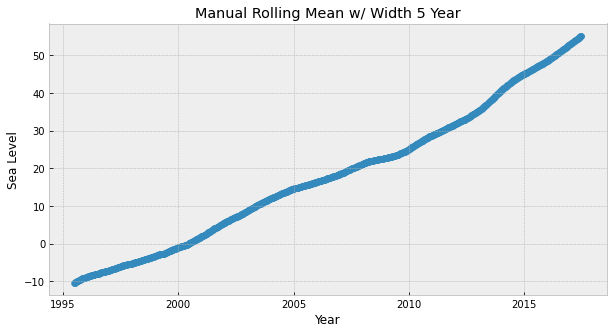

In [40]:
width = 250
mean_lst = []
time_lst = []
for i in range(0, len(sealev) - width):
  width_mean = np.mean(sealev[i:i+width])
  time_mean = np.mean(year[i:i+width])
  mean_lst.append(width_mean)
  time_lst.append(time_mean)
  #will need to do twice if height and width, xy
#mean_lst
plt.scatter(x = time_lst, y = mean_lst)
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.title('Manual Rolling Mean w/ Width %i' % (width/50) + ' Year')

Text(0.5, 1.0, 'Scipy Rolling Mean w/ Width 1 Year')

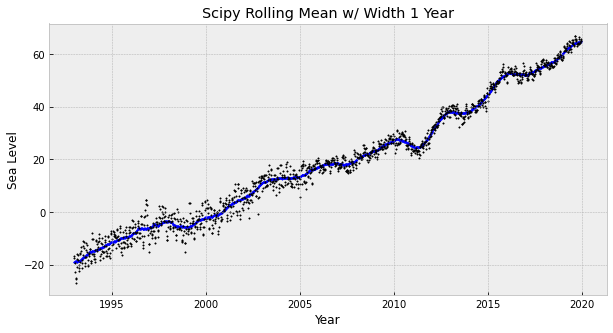

In [51]:
#note, scipy version doesn't need to use new_time
#it somehow interpolates through images so new_sealev is same len() as og_time
from scipy import ndimage, misc
width = 50
new_sealev = ndimage.uniform_filter(sealev, size = width)
new_time = ndimage.uniform_filter(year, size= width)

plt.scatter(year, new_sealev, c = 'b', s = 2)
plt.scatter(year, sealev, c = 'k', s = 2)
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.title('Scipy Rolling Mean w/ Width %i' % (width/50) + ' Year')

Text(0.5, 1.0, 'Scipy Rolling Mean w/ Width 5 Year')

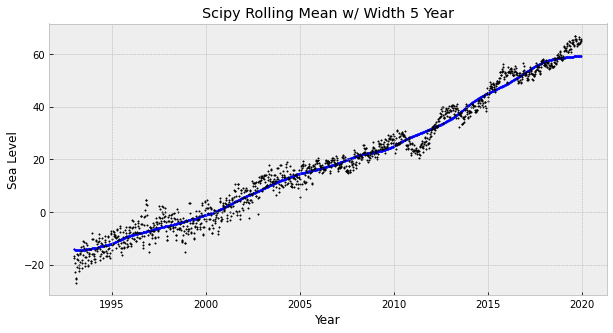

In [52]:
width = 250
new_sealev = ndimage.uniform_filter(sealev, size = width)
new_time = ndimage.uniform_filter(year, size= width)

plt.scatter(year, new_sealev, c = 'b', s = 2)
plt.scatter(year, sealev, c = 'k', s = 2)
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.title('Scipy Rolling Mean w/ Width %i' % (width/50) + ' Year')

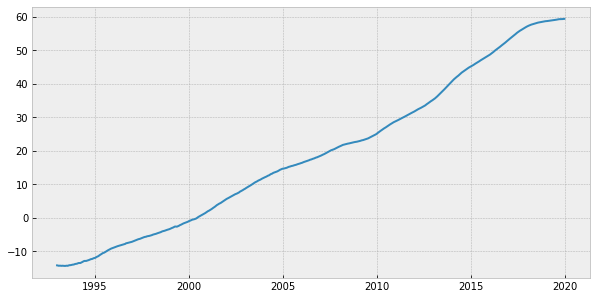

In [44]:
plt.plot(year, new_sealev)

In [42]:
len(new_sealev)

1350